In [18]:
data = []
for i in range(1, 28):
    item = f"/Users/penway/Projects/Gear0/20201028/Throughput/3027_217_Data_Chan{i}.mat"
    import scipy.io as sio
    import numpy as np
    datai = sio.loadmat(item)
    datai2 = np.array(datai['Data1'])
    data.append(datai2)

/Users/penway/miniconda3/envs/brain39/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "Data1" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/Users/penway/miniconda3/envs/brain39/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "Count" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/Users/penway/miniconda3/envs/brain39/lib/python3.9/site-packages/scipy/io/matlab/_mio.py:227: MatReadWarning: Duplicate variable name "Head_1" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)


In [23]:
# make data list of (1, x) to (27, x)
data = np.array(data)
# turn from 27, 1, x to 27, x
data = np.squeeze(data, axis=1)
print(data.shape)

(27, 282624)


/var/folders/3p/_gxvks0n5y7dmdzp5_xyp_z40000gn/T/ipykernel_96186/2273803486.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 600x500 with 5 Axes> than <Figure size 640x480 with 1 Axes> which fig.colorbar is called on.
  plt.colorbar(im, label='Correlation', ticks=[-1, 0, 1])


Text(0.5, 1.0, 'Correlation Matrix of Channels')

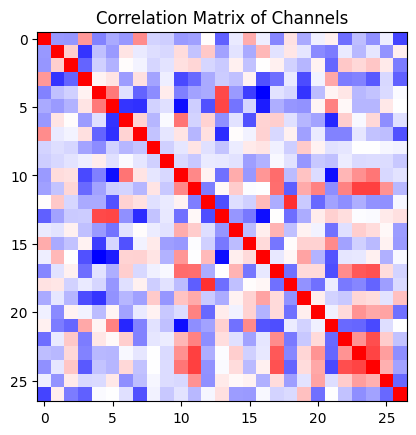

In [33]:
# correlation on all channels
corr_matrix = np.corrcoef(data)
import matplotlib.pyplot as plt
plt.imshow(corr_matrix, cmap='bwr', interpolation='nearest')
plt.colorbar(im, label='Correlation', ticks=[-1, 0, 1])
plt.title('Correlation Matrix of Channels')

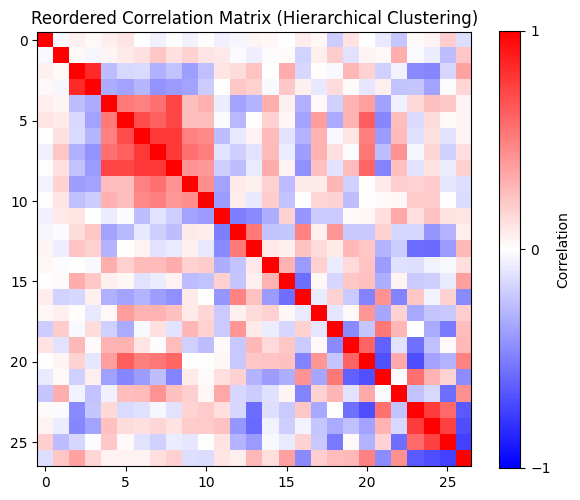

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, leaves_list
from scipy.spatial.distance import pdist, squareform

# Step 1: Compute correlation matrix
corr_matrix = np.corrcoef(data)

# Step 2: Convert correlation to distance for clustering
# Use 1 - abs(corr) as distance metric
distance_matrix = 1 - np.abs(corr_matrix)

# Step 3: Condense the distance matrix (required by linkage)
condensed_dist = squareform(distance_matrix, checks=False)

# Step 4: Hierarchical clustering
linkage_matrix = linkage(condensed_dist, method='average')
ordered_indices = leaves_list(linkage_matrix)

# Step 5: Reorder the correlation matrix
reordered_corr = corr_matrix[np.ix_(ordered_indices, ordered_indices)]

# Step 6: Plot
plt.figure(figsize=(6, 5))
im = plt.imshow(reordered_corr, cmap='bwr', interpolation='nearest', vmin=-1, vmax=1)
plt.colorbar(im, label='Correlation', ticks=[-1, 0, 1])
plt.title('Reordered Correlation Matrix (Hierarchical Clustering)')
plt.tight_layout()
plt.show()